In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools
import schottky as sch
import fitutils as ft

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [62]:
# Constants

k = 1.380649e-23
delta = 2.9461005*k*2.4
r = 8.31446261815324  # J/mol.K

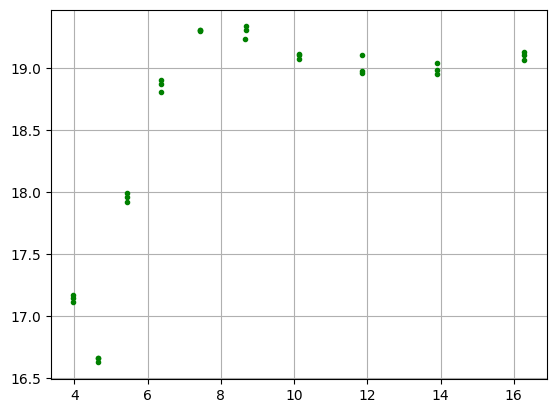

[ 3.96951789  3.97251019  3.96942266  4.65501294  4.64915532  4.64656523
  5.43671856  5.43207952  5.43002079  6.36125273  6.35992413  6.35488185
  7.42865387  7.42680497  7.42190148  8.67991237  8.67950816  8.67539294
 10.14827927 10.14547165 10.14483717 11.86949606 11.86600769 11.86090801
 13.89370011 13.89722946 13.89465733 16.27818114 16.28129198 16.27797779]
[2.1575479 2.15619  ]


In [35]:
plt.figure()
plt.plot(squared_temperature[0:30], C_div_T[0:30], ".g")
plt.grid(True)
plt.show()

print(squared_temperature[0:30])
print(np.sqrt(squared_temperature[3:5]))

9.7620737021388e-23


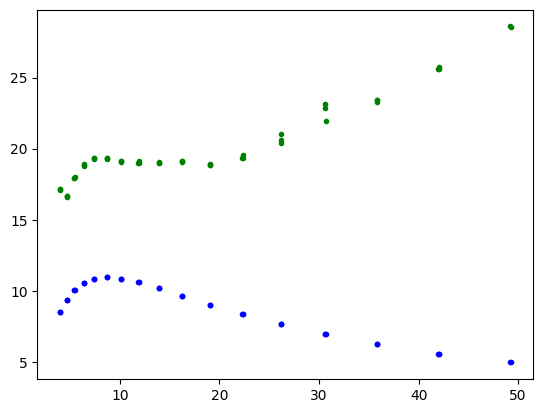

In [55]:
E = 2.4*k*np.sqrt(sch.max_schottky(squared_temperature, C_div_T, 0, 16)[0])

print(E)

plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")        
plt.plot(squared_temperature[0:50], sch.schottky(temperature[0:50], E, n=3e-3), ".b")

161.1378353444146


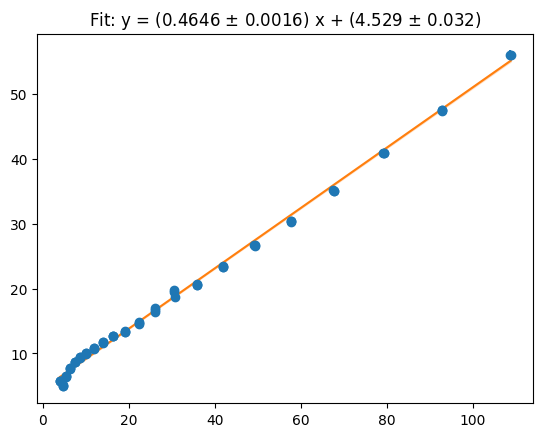

In [71]:
# Linear fit en mJ/K**2.mol, entre 0 et 10 K environ, n=8e-3

HC_sample_substracted = sample_HC - sch.schottky(temperature, E, n=8e-3) #en mJ/mol.K
C_substracted_divT = HC_sample_substracted / temperature

ajustement = ft.linfitxy(squared_temperature[0:65], C_substracted_divT[0:65], 2*err_temperature[0:65]*temperature[0:65], err_C_divT[0:65], 
                         plot=True)

beta = ajustement[0]*1e-3 # en mJ

pi4 = np.pi**4
temp_debye_cube = (12*r*pi4)/(5*beta)
temp_debye = np.cbrt(temp_debye_cube)  # en K 

print(temp_debye)


169.94245303967256


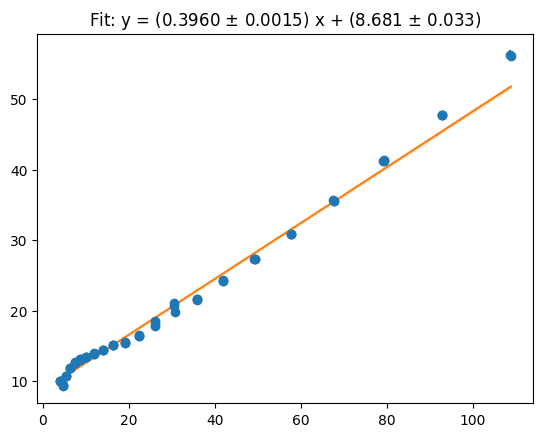

In [76]:
# Linear fit en mJ/K**2.mol, entre 0 et 10 K environ, n varie

HC_sample_substracted = sample_HC - sch.schottky(temperature, E, n=5e-3) #en mJ/mol.K
C_substracted_divT = HC_sample_substracted / temperature

ajustement = ft.linfitxy(squared_temperature[0:65], C_substracted_divT[0:65], 2*err_temperature[0:65]*temperature[0:65], err_C_divT[0:65], 
                         plot=True)

beta = ajustement[0]*1e-3 # en mJ

pi4 = np.pi**4
temp_debye_cube = (12*r*pi4)/(5*beta)
temp_debye = np.cbrt(temp_debye_cube)  # en K 

print(temp_debye)


154.22820405476094


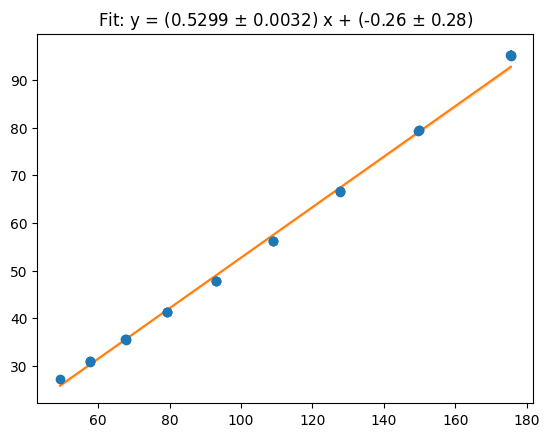

In [78]:
# Linear fit en mJ/K**2.mol, sur la partie post Schottky

HC_sample_substracted = sample_HC - sch.schottky(temperature, E, n=5e-3) #en mJ/mol.K
C_substracted_divT = HC_sample_substracted / temperature

ajustement = ft.linfitxy(squared_temperature[50:75], C_substracted_divT[50:75], 2*err_temperature[50:75]*temperature[50:75], err_C_divT[50:75], 
                         plot=True)

beta = ajustement[0]*1e-3 # en mJ

pi4 = np.pi**4
temp_debye_cube = (12*r*pi4)/(5*beta)
temp_debye = np.cbrt(temp_debye_cube)  # en K 

print(temp_debye)


In [81]:
14**2

196